In [2]:
#How often did the company increase (or decrease) in price on a given day?

#To analyze this we need intraday data

In [15]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [14]:
#Fetching intraday data and filtering to a specific day
data = yf.download(tickers='MSFT', period='2d', interval='15m')
df = pd.DataFrame(data)
df = df.loc[df.index.date == pd.to_datetime('2023-12-04').date()]
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-12-04 09:30:00,369.100006,369.299988,365.530090,365.779999,365.779999,4547394
2023-12-04 09:45:00,365.769989,366.200012,363.679993,365.019989,365.019989,2643241
2023-12-04 10:00:00,365.019989,366.399902,364.760010,365.100006,365.100006,1499294
2023-12-04 10:15:00,365.130005,365.250000,363.067993,363.640015,363.640015,1688133
2023-12-04 10:30:00,363.609985,364.540009,363.100006,364.010010,364.010010,1242992
2023-12-04 10:45:00,364.019989,364.890015,362.899994,364.440002,364.440002,1309186
2023-12-04 11:00:00,364.440002,364.940002,363.950012,364.480011,364.480011,800844
2023-12-04 11:15:00,364.459991,365.859985,364.220001,365.709991,365.709991,867011
2023-12-04 11:30:00,365.710114,366.519989,365.577698,366.140015,366.140015,628218


In [19]:
#Calculating the change between high and low values
df['price_change'] = df['Open'] - df['Close']

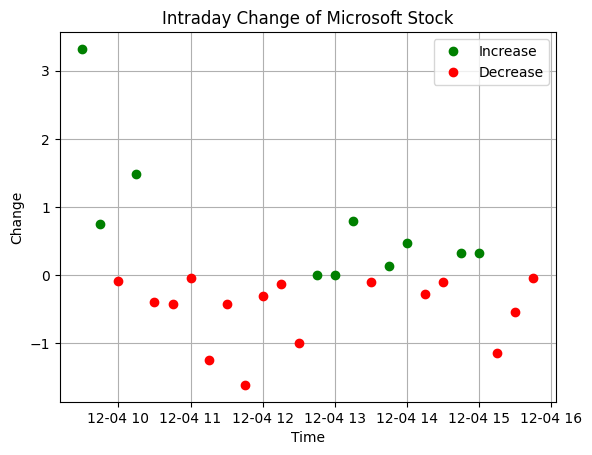

In [21]:
# Plotting positive changes (increase in high-low spread)
plt.plot(df[df['price_change'] > 0].index, df[df['price_change'] > 0]['price_change'], 'go', label='Increase')

# Plotting negative changes (decrease in high-low spread)
plt.plot(df[df['price_change'] < 0].index, df[df['price_change'] < 0]['price_change'], 'ro', label='Decrease')

# Customize the plot
plt.title('Intraday Change of Microsoft Stock')
plt.xlabel('Time')
plt.ylabel('Change')
plt.legend()
plt.grid(True)
plt.show()

What is the general trend of average monthly closing prices over the year?

In [64]:
df_Msft = pd.read_csv('Microsoft_Data.csv')
df_Msft['Date'] = pd.to_datetime(df_Msft['Date'])
df_Msft.set_index('Date', inplace=True)
df_Msft

,Open,High,Low,Close,Volume
Date,,,,,
2013-12-05,32.713887,32.739151,31.307654,31.998140,116305000
2013-12-06,32.351814,32.461282,31.989732,32.301292,36457300
2013-12-09,32.469690,32.730726,32.309698,32.595997,30286000
2013-12-10,32.511795,32.755992,32.014982,32.090767,37828600
2013-12-11,32.048663,32.250755,31.484483,31.669737,39853400
...,...,...,...,...,...
2023-11-29,383.760010,384.299988,377.440002,378.850006,28963400
2023-11-30,378.489990,380.089996,375.470001,378.910004,30554400
2023-12-01,376.760010,378.160004,371.309998,374.510010,33020400


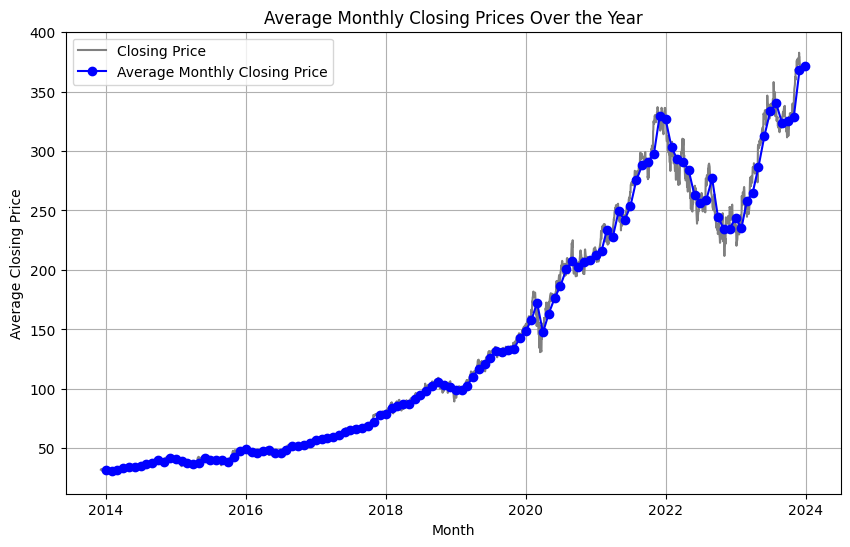

In [40]:
# Resample to calculate average monthly closing prices
monthly_avg = df_Msft['Close'].resample('M').mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_Msft.index, df_Msft['Close'], label='Closing Price', color='grey')
plt.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-', color='b', label='Average Monthly Closing Price')

# Customize the plot
plt.title('Average Monthly Closing Prices Over the Year')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.legend()
plt.grid(True)
plt.show()

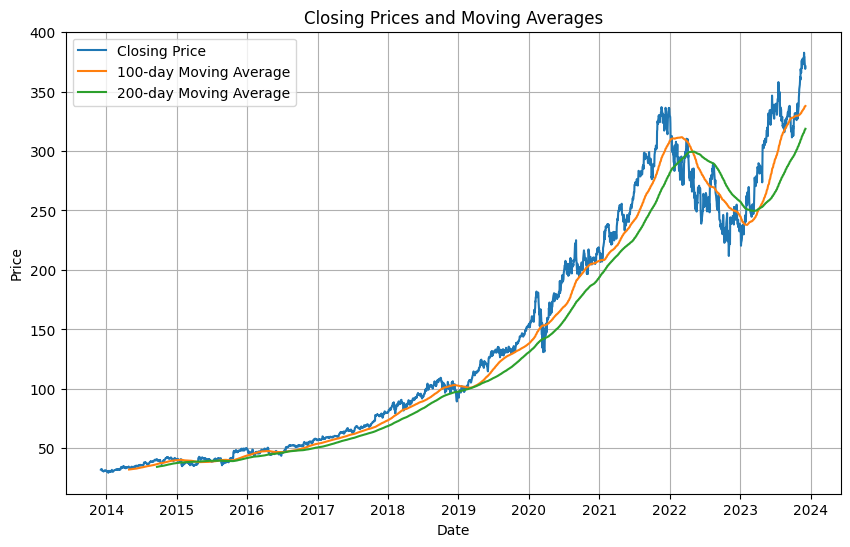

In [37]:
# Calculate 100-day and 200-day moving averages
df_Msft['100_days_avg'] = df_Msft['Close'].rolling(window=100).mean()
df_Msft['200_days_avg'] = df_Msft['Close'].rolling(window=200).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_Msft.index, df_Msft['Close'], label='Closing Price')
plt.plot(df_Msft.index, df_Msft['100_days_avg'], label='100-day Moving Average')
plt.plot(df_Msft.index, df_Msft['200_days_avg'], label='200-day Moving Average')

# Customize the plot
plt.title('Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Date
1     3.688555e+07
2     3.423037e+07
3     3.608519e+07
4     3.244550e+07
5     2.771866e+07
6     2.942893e+07
7     2.871422e+07
8     2.438970e+07
9     2.830163e+07
10    3.066263e+07
11    2.734696e+07
12    2.950415e+07
Name: Volume, dtype: float64


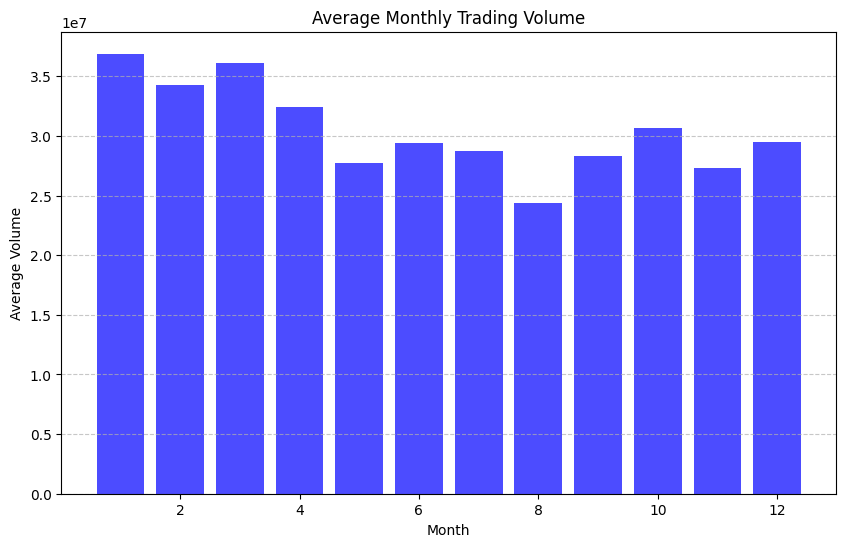

In [69]:
#Are there any seasonal patterns in trading volumes?

#filtering data 
filtered_df = df_Msft[(df_Msft.index >= '2014-01-01') & (df_Msft.index <= '2022-12-31')]

#grouping by month and calculate the average volume
monthly_avg = filtered_df.groupby(filtered_df.index.month)['Volume'].mean()
print(monthly_avg)

#plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg.index, monthly_avg, color='b', alpha=0.7)

plt.title('Average Monthly Trading Volume')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()